In [ ]:
# Import necessary library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


/home/feven/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [ ]:
# Simple column description - count, mean, std, min, ,max and percentile

In [2]:
df = pd.read_csv("../data/benin-malanville.csv")
print (df.describe())
df.head()

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [ ]:
## Check for NaNa , null , missing value

In [4]:
print("Missing value column")
print((df. isna().sum()), end="\n\n\n\n")
 # check if  any missing,none,NaNa values in the dataset


threshold = 0.05
null= df.isnull().mean()
count=  null[null>threshold].index.tolist()
print("Columns with more than 5% nulls:", count,  end="\n")

Missing value column
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64



Columns with more than 5% nulls: ['Comments']


In [ ]:
# Check for missing value

In [21]:
key_cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"] # define the suggested columns as per instructed
print("Missing values per column:")
print ( df[key_cols].isnull().sum())


Missing values per column:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


In [ ]:
# Check for outliner

Missing values per column:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64

Descriptive statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB             WS         WSgust  
count  525600.000000  525600.000000  525600.000000  
mean      228.883576       2.121113       2.809195  
std       316.536515       1.603466       2.029120  
min         0.000

NameError: name 'df_raw' is not defined

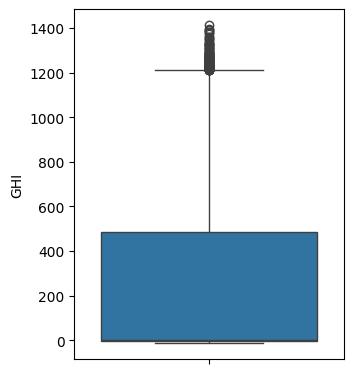

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1️⃣ Columns
# -------------------------------
irradiance_cols = ['GHI', 'DNI', 'DHI']
sensor_cols = ['ModA', 'ModB', 'WS', 'WSgust']
all_cols = irradiance_cols + sensor_cols


# -------------------------------
# 3️⃣ Descriptive statistics
# -------------------------------
print("\nDescriptive statistics:")
print(df[all_cols].describe())

# -------------------------------
# 4️⃣ Outlier detection function using IQR
# -------------------------------
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

# -------------------------------
# 5️⃣ Print ALL outliers per column
# -------------------------------
for col in all_cols:
    print("\n==========================")
    print(f" OUTLIERS IN {col}")
    print("==========================")

    outliers = find_outliers(df[col])
    total = len(outliers)

    print(f"Total outliers: {total}")

    if total == 0:
        print("✅ No outliers detected.")
    else:
        print(outliers.to_string())  # print all outlier values cleanly

# -------------------------------
# 6️⃣ Boxplots for visualization
plt.figure(figsize=(16, 10))
for i, col in enumerate(all_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col])
    data_min = df_raw[col].min()
    data_max = df_raw[col].max()
    y_padding = max(abs(data_min), abs(data_max)) * 0.1
    
    plt.ylim(data_min - y_padding, data_max + y_padding)
    plt.title(f'{col}\n(min: {data_min:.1f}, max: {data_max:.1f})')
    
    if col in ['GHI', 'DNI', 'DHI']:
        plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
    
plt.tight_layout()
plt.show()


